# Gaussian Mixture Model (GMM)

A Gaussian Mixture Model (GMM) is a probabilistic model that represents a mixture of multiple Gaussian (normal) distributions. It is commonly used for modeling complex probability distributions, especially in cases where the underlying data may be generated by several different processes.

In a Gaussian Mixture Model, the overall probability distribution is a combination of several Gaussian distributions, each associated with a different component of the mixture. Each component represents a cluster or group of data points within the overall dataset. The model assumes that the data points are generated by selecting one of the Gaussian distributions with certain probabilities.

The key parameters of a GMM include:

1. Means: The mean vector for each Gaussian component, indicating the central location of the distribution.

2. Covariance Matrices: Describing the spread or shape of the distribution for each component. It accounts for the correlation between different features in the data.

3. Weights: The probabilities of selecting each component in the mixture. These weights must sum to 1.

The probability density function (PDF) of a GMM is given by the weighted sum of the individual Gaussian distributions

$p(x) = \sum_{i=1}^k w_i \mathcal{N}(x | \mu_i, \Sigma_i)$

* $p(x)$ is the overall probability density function
* $w_i$ is the weight of the i-th component.
* $\mathcal{N}(x | \mu_i, \Sigma_i)$ is the Gaussian distribution with mean $\mu_i$ and covariance matrix $Σ_i$.
* $k$ is the number of components in the mixture


## GMM Steps
Performing Gaussian Mixture Model (GMM) involves estimating the parameters (means, covariances, and weights) of the mixture model based on a set of sample data. The typical approach for GMM parameter estimation is through the Expectation-Maximization (EM) algorithm. Here are the main steps

1. **Initialization:**
   - Choose the number of components (clusters) for the GMM.
   - Initialize the means ($\mu_i$), covariances ($\Sigma_i$), and weights ($w_i$) for each component.
   - Common initialization methods include k-means clustering for means, sample covariances for covariances, and equal weights.

2. **Expectation Step (E-step):**
   - Compute the posterior probability (responsibility) of each component for each data point using Bayes' rule:

     $ \gamma(z_{i,k}) = \frac{w_k \cdot \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} w_j \cdot \mathcal{N}(x_i | \mu_j, \Sigma_j)} $
     
   - Here, $z_{i,k}$ represents the assignment of data point $x_i$ to component $k$, and $\gamma(z_{i,k})$ is the posterior probability.

3. **Maximization Step (M-step):**
   - Update the parameters based on the weighted data points:

     $ \mu_k^{new} = \frac{\sum_{i=1}^{N} \gamma(z_{i,k}) \cdot x_i}{\sum_{i=1}^{N} \gamma(z_{i,k})} $

     $ \Sigma_k^{new} = \frac{\sum_{i=1}^{N} \gamma(z_{i,k}) \cdot (x_i - \mu_k^{new})(x_i - \mu_k^{new})^T}{\sum_{i=1}^{N} \gamma(z_{i,k})} $

     $ w_k^{new} = \frac{1}{N} \sum_{i=1}^{N} \gamma(z_{i,k}) $
   - $N$ is the number of data points.

4. **Convergence Check:**
   - Repeat the E-step and M-step iteratively until the change in the log-likelihood or parameters is below a predefined threshold, or until a maximum number of iterations is reached.

5. **Finalization:**
   - The final means ($\mu_k$), covariances ($\Sigma_k$), and weights ($w_k$) represent the parameters of the GMM.

This process iteratively refines the parameters to maximize the likelihood of the observed data under the GMM. The EM algorithm ensures that each data point contributes to the model based on its estimated probability of belonging to each component. Keep in mind that GMMs are sensitive to the initializations, and multiple runs with different initializations may be necessary to find a good solution.

In [1]:
# Generate 2D data from a random Gaussian distribution
#mean_actual = np.array([2.0, 3.0])
#covariance_actual = np.array([[1.0, 0.5], [0.5, 2.0]])
#data_2d = np.random.multivariate_normal(mean_actual, covariance_actual, size=30000)

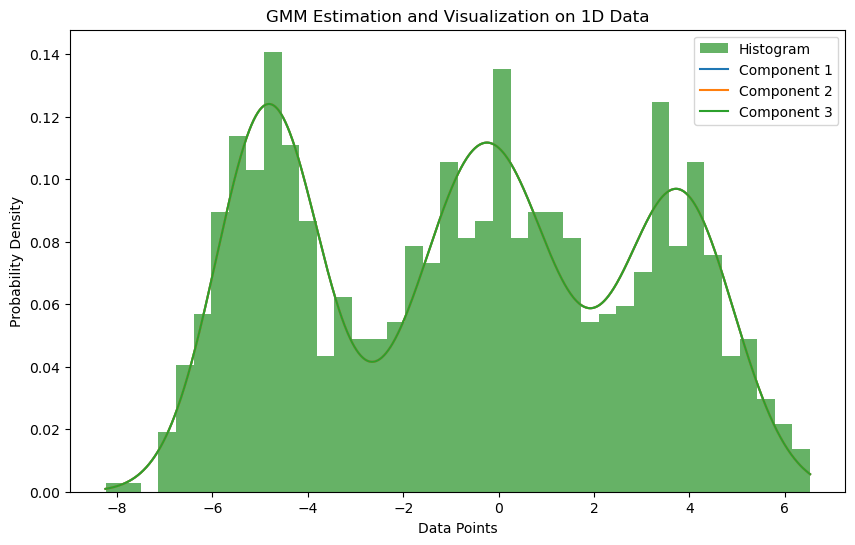

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Step 1: Generate or Load 1D Data
# Example: Generate a mixture of three Gaussian distributions
np.random.seed(42)
data = np.concatenate([np.random.normal(-5, 1, 300),
                       np.random.normal(0, 2, 500),
                       np.random.normal(4, 1, 200)])

# Step 2: Fit GMM to Data
# You need to specify the number of components (clusters)
num_components = 3
gmm = GaussianMixture(n_components=num_components, random_state=42)
gmm.fit(data.reshape(-1, 1))

# Step 3: Visualize Data and GMM Components
plt.figure(figsize=(10, 6))

# Plot Histogram of Data
plt.hist(data, bins=40, density=True, alpha=0.6, color='g', label='Histogram')

# Plot GMM Components
x = np.linspace(min(data), max(data), 1000)
for i in range(num_components):
    pdf = np.exp(gmm.score_samples(x.reshape(-1, 1)))
    plt.plot(x, pdf, label=f'Component {i + 1}')

plt.title('GMM Estimation and Visualization on 1D Data')
plt.xlabel('Data Points')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
